In [22]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [37]:
from astropy.table import Table, vstack
from Ska.Matplotlib import plot_cxctime, cxctime2plotdate as c2p
import cPickle
from Ska.Numpy import interpolate
import os

Read in sources from table file

In [3]:
srcs = Table.read('src_table.dat', format='ascii')
used = (srcs['NET_COUNTS'] > 2500) & (srcs['point_source'] == 'True')
srcs = srcs[used]

Look at the distributions of these sources.

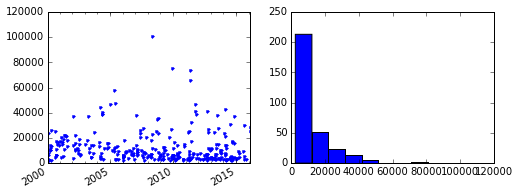

In [4]:
figure(figsize=(8,3));
subplot(1,2,1)
plot_cxctime(srcs['kalman_tstart'], srcs['NET_COUNTS'], 'b.');
subplot(1,2,2)
hist(srcs['NET_COUNTS']);


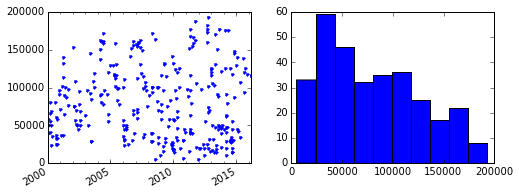

In [5]:
figure(figsize=(8,3));
subplot(1,2,1)
plot_cxctime(srcs['kalman_tstart'], srcs['kalman_tstop'] - srcs['kalman_tstart'], 'b.');
subplot(1,2,2)
hist(srcs['kalman_tstop'] - srcs['kalman_tstart']);

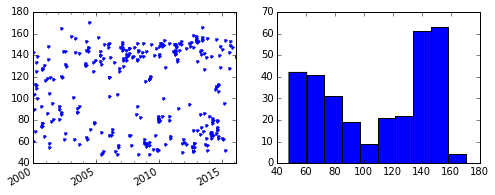

In [6]:
figure(figsize=(8,3));
subplot(1,2,1)
plot_cxctime(srcs['kalman_tstart'], srcs['pitch'], 'b.');
subplot(1,2,2)
hist(srcs['pitch']);


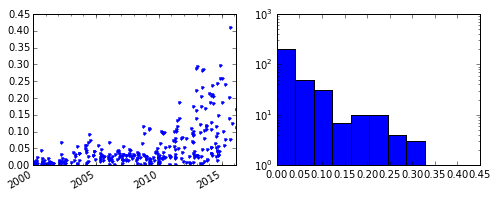

In [7]:
figure(figsize=(8, 3))
subplot(1,2,1)
plot_cxctime(srcs['kalman_tstart'], srcs['oobagrd3_diff'], 'b.');
subplot(1,2,2)
hist(srcs['oobagrd3_diff'], log=True);

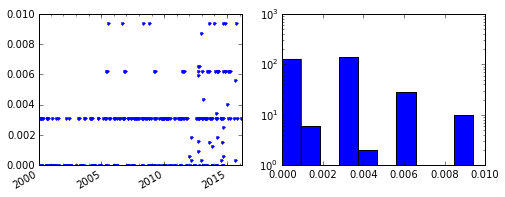

In [8]:
# not much variation in diametrical gradient and large steps
figure(figsize=(8, 3))
subplot(1,2,1)
plot_cxctime(srcs['kalman_tstart'], srcs['oobagrd6_diff'], 'b.');
subplot(1,2,2)
hist(srcs['oobagrd6_diff'], log=True);

Fit coefficients on y-angle drifts

In [9]:
from tilt.per_obsid_fits import run_fits


failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find xpaget on your PATH'


failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find xpaget on your PATH'


In [10]:
AX = 'yag'
fits = run_fits(srcs['obsid'], ax=AX);

per_obs_nfits/obs17102/model.pkl
per_obs_nfits/obs17105/model.pkl
per_obs_nfits/obs17739/model.pkl
per_obs_nfits/obs17128/model.pkl
per_obs_nfits/obs16689/model.pkl
per_obs_nfits/obs17857/model.pkl
per_obs_nfits/obs17452/model.pkl
per_obs_nfits/obs17109/model.pkl
per_obs_nfits/obs17648/model.pkl
per_obs_nfits/obs15718/model.pkl
per_obs_nfits/obs16528/model.pkl
per_obs_nfits/obs16659/model.pkl
per_obs_nfits/obs16672/model.pkl
per_obs_nfits/obs15803/model.pkl
per_obs_nfits/obs16219/model.pkl
per_obs_nfits/obs15722/model.pkl
per_obs_nfits/obs16511/model.pkl
per_obs_nfits/obs15747/model.pkl
per_obs_nfits/obs15733/model.pkl
per_obs_nfits/obs15871/model.pkl
per_obs_nfits/obs16527/model.pkl
per_obs_nfits/obs16007/model.pkl
per_obs_nfits/obs16510/model.pkl
per_obs_nfits/obs15732/model.pkl
per_obs_nfits/obs15731/model.pkl
per_obs_nfits/obs16509/model.pkl
per_obs_nfits/obs15787/model.pkl
per_obs_nfits/obs14479/model.pkl
per_obs_nfits/obs16311/model.pkl
per_obs_nfits/obs15786/model.pkl
per_obs_nf

Read out the coefficients from those fits into arrays and associate them with the sources.

In [11]:
srcs['{}_axial'.format(AX)] = [f[AX]['axial'] for f in fits]
srcs['{}_axial_parmax'.format(AX)] = [f[AX]['axial_parmax'] if f[AX]['axial_parmax'] is not None
                            else np.nan for f in fits]
srcs['{}_diam'.format(AX)] = [f[AX]['diam'] for f in fits]
srcs['{}_diam_parmax'.format(AX)] = [f[AX]['diam_parmax'] if f[AX]['diam_parmax'] is not None
                           else np.nan for f in fits]

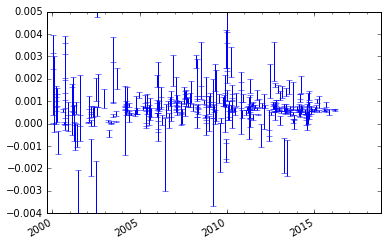

In [12]:
figure()
plot_cxctime(srcs['kalman_tstart'],
             srcs['{}_axial'.format(AX)],
             yerr=srcs['{}_axial_parmax'.format(AX)],
            linestyle='');

ylim(-0.004, 0.005);

/proj/sot/ska/arch/x86_64-linux_CentOS-5/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


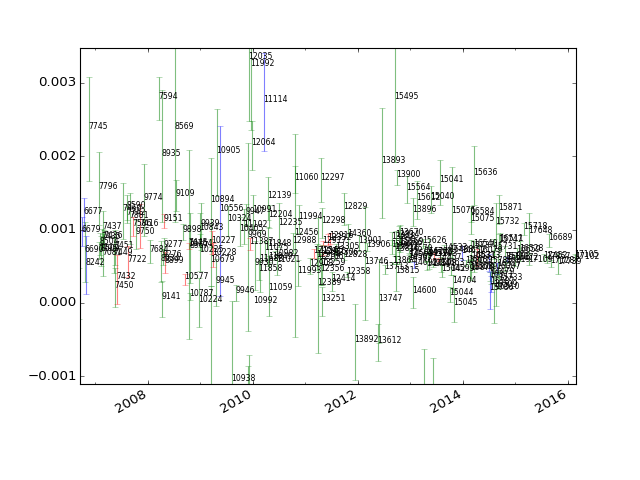

In [45]:
figure()
from itertools import izip
for det, color in izip(['HRC-S', 'ACIS-S', 'ACIS-I'], ['r', 'g', 'b']):
    det_src = srcs['detector'] == det
    if not np.any(det_src):
        print det
        continue
    plot_cxctime(srcs['kalman_tstart'][det_src],
                 srcs['{}_axial'.format(AX)][det_src],
             yerr=srcs['{}_axial_parmax'.format(AX)][det_src],
                 color=color,
                 alpha=.5,
            linestyle='');
for src in srcs:
    x = c2p([src['kalman_tstart']])[0]
    y = src['{}_axial'.format(AX)]
    annotate(src['obsid'], (x, y), size='xx-small')
        
    
ylim(-0.004, 0.005);

(-0.005, 0.005)

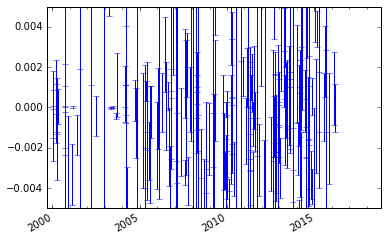

In [13]:
# diam coeff does not get fit well
figure()
plot_cxctime(srcs['kalman_tstart'],
             srcs['{}_diam'.format(AX)], yerr=srcs['{}_diam_parmax'.format(AX)],
            linestyle='');
ylim(-0.005, 0.005)

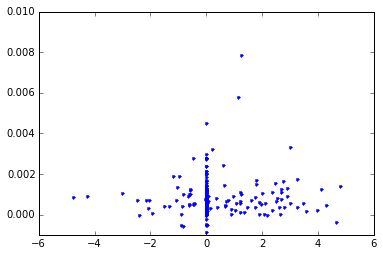

In [14]:
figure()
plot(srcs['{}_diam'.format(AX)], srcs['{}_axial'.format(AX)], '.');
ylim(-.001, .01);


(-0.001, 0.01)

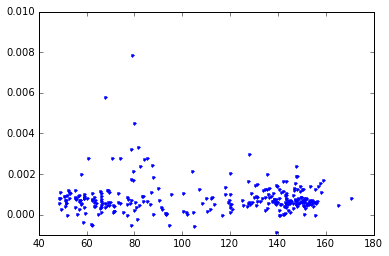

In [15]:
figure()
plot(srcs['pitch'], srcs['{}_axial'.format(AX)], '.')
ylim(-0.001, .01)

(-0.001, 0.01)

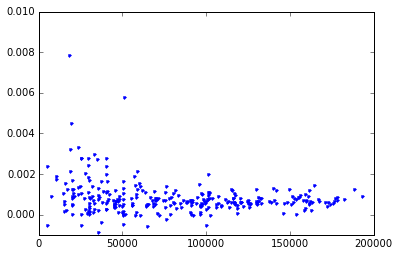

In [16]:
figure()
plot(srcs['kalman_tstop'] - srcs['kalman_tstart'], srcs['{}_axial'.format(AX)], '.')
ylim(-0.001, .01)

Get a "compromise" coefficient for the axial gradient

In [17]:
# get an average on the axial gradient
# RSS to get new weights
has_no_error = np.isnan(srcs['{}_axial_parmax'.format(AX)])
ok = ~has_no_error
new_err = 0.0002
errors = np.sqrt(srcs['{}_axial_parmax'.format(AX)][ok]**2 + new_err**2)
error_sum = np.sum(errors)
weights = error_sum / errors

In [18]:
ax_axial_average = np.average(srcs['{}_axial'.format(AX)][ok], weights=weights)
ax_axial_average

0.00068816362760296514

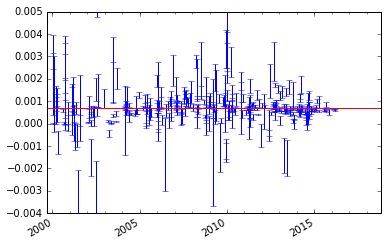

In [19]:
figure()
plot_cxctime(srcs['kalman_tstart'],
             srcs['{}_axial'.format(AX)], yerr=srcs['{}_axial_parmax'.format(AX)],
            linestyle='');
plot([xlim()[0], xlim()[1]], [ax_axial_average, ax_axial_average], 'r');
ylim(-0.004, 0.005);

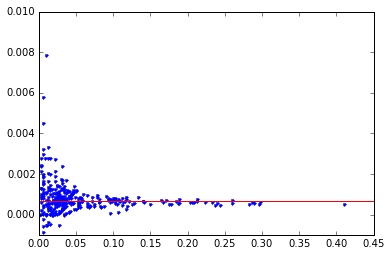

In [20]:
figure()
plot(srcs['oobagrd3_diff'], srcs['{}_axial'.format(AX)], '.')
ylim(-0.001, .01)
plot([xlim()[0], xlim()[1]], [ax_axial_average, ax_axial_average], 'r');

In [21]:
ax_axial_average

0.00068816362760296514